In [375]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
import seaborn as sns
import statistics
import functools
import operator

from sklearn.feature_extraction import stop_words
from collections import Counter

pd.set_option('display.max_columns', 100)

Populating the interactive namespace from numpy and matplotlib


### Load Data and Define Functions

In [2]:
df = pd.read_pickle("D:\\MMHS150K\\Dog_Whistle5k\\Annotations\\final_ground_truth.pkl")
df.head()

,image_number,tweet_text,img_text,Modality_string,Primary_string,Strategies_string,Strength_string,Target_string,Tweet ID,Modality_numeric,Primary_numeric,Strategies_numeric,Strength_numeric,Target_categories,Target_numeric,Primary_string_gt,Primary_string_expert,Modality_string_gt,Modality_string_expert,Primary_numeric_gt,Primary_numeric_expert,Modality_numeric_gt,Modality_numeric_expert,Strategies_numeric_gt,Strategies_numeric_expert,Unimodal_text_string,Unimodal_image_string,Unimodal_text_numeric,Unimodal_image_numeric,Primary_numeric_expert_is_ambiguous,Modality_numeric_expert_is_ambiguous,Strategies_numeric_expert_is_ambiguous,Strength_numeric_is_ambiguous
0,1115260061952151552,@shadyjessicuh @guskenworthy @ColtonLHaynes @S...,BUTTHURT REPORT Date of Hurtfulness Time: What...,"[multimodal, multimodal]","[hateful, hateful]","[normative, explicit]","[derogation, derogation]","[liberal people, sjws]",1115260061952151552,"[3, 3]","[1, 1]","[2, 1]","[2, 2]","[[liberals], [liberals]]","[[10], [10]]",hateful,hateful,multimodal,multimodal,1,1.0,3,3.0,1,1.0,hateful,hateful,1,1,1,1,1,1
1,1057754597761183744,⬇ Bang Me tonight ⬇ 🍵🔔 https://t.co/IkQajkcS...,NaN,"[none, none]","[none, none]","[none, none]","[none, none]","[none, none]",1057754597761183744,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[[none], [none]]","[[0], [0]]",none,NaN,none,NaN,0,NaN,0,NaN,0,NaN,none,none,0,0,0,0,0,1
2,1057748612472561664,"@LHissrich Yeah fuck this i am out, have fun w...",NaN,"[multimodal, multimodal]","[hateful, hateful]","[explicit, creative]","[derogation, animosity]","[liberal people, sjws]",1057748612472561664,"[3, 3]","[1, 1]","[1, 2]","[2, 1]","[[liberals], [liberals]]","[[10], [10]]",hateful,hateful,multimodal,multimodal,1,1.0,3,3.0,2,2.0,hateful,hateful,1,1,1,1,1,0
3,1116731612136398848,HE A WHOLE NIGGA https://t.co/Mnkiuc57BL,Than a boy with luv,"[none, none]","[none, none]","[none, none]","[none, none]","[none, none]",1116731612136398848,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[[none], [none]]","[[0], [0]]",none,NaN,none,NaN,0,NaN,0,NaN,0,NaN,none,none,0,0,0,0,0,1
4,1063748973306028033,Rejoice and enjoy a delicious twat! It’s Sweet...,NaN,"[text-unimodal, none]","[hateful, none]","[normative, none]","[derogation, none]","[women, none]",1063748973306028033,"[1, 0]","[1, 0]","[2, 0]","[2, 0]","[[sex/gender], [none]]","[[7], [0]]",none,none,none,none,0,0.0,0,0.0,0,0.0,none,none,0,0,1,1,1,0


In [13]:
#reset directory
os.chdir("D:\\MMHS150K\\Dog_Whistle5k\\Visualizations")

In [14]:
#Create dataframe slices
df_not_none = df[df["Primary_numeric_gt"] != 0]
df_hate = df[df["Primary_numeric_gt"] == 1]
df_explicit = df[df["Strategies_numeric_gt"]==1]
df_dw = df[df["Strategies_numeric_gt"]==2]

In [425]:
def show_values_on_bars(axs):
    """
    Labels barplots with height for all axes when input is axes
    """
    def _show_on_single_plot(ax):  
        """
        Labels barplots with height for individual axis
        """
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height() + 0.5
            value = '{:.1f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
        

        
def autolabel(rects):
    """
    Labels bar plots with height when input is bar in bar plot
    """
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

### Plot Distribution of Labels Across Categories

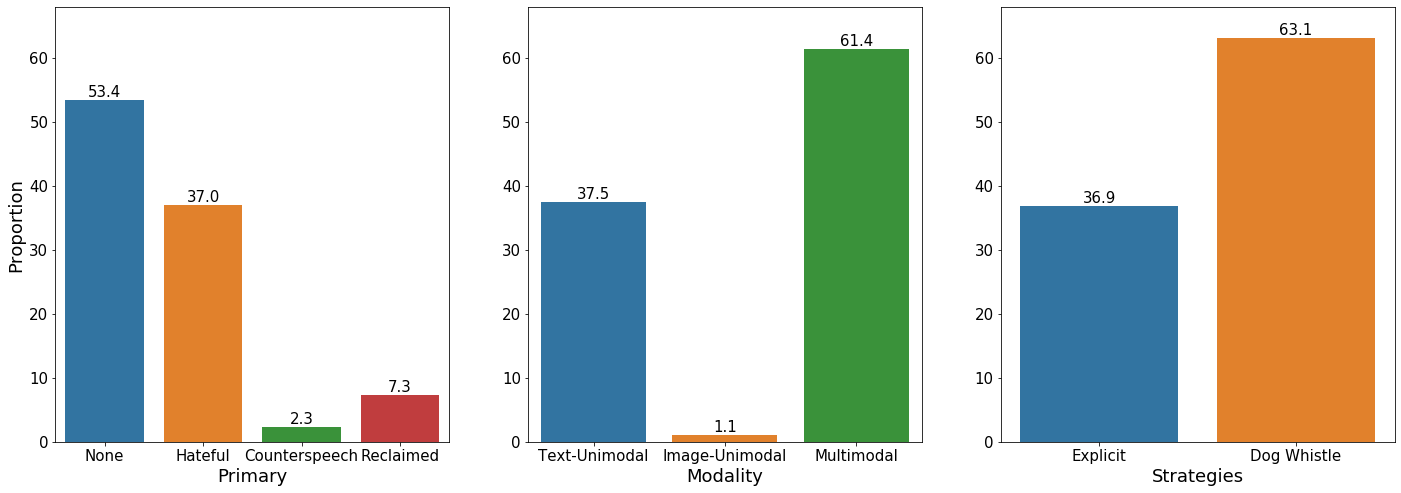

In [432]:
fig = plt.figure(figsize=(24, 8))
subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.15)
plt.rc('font', size=15)
plt.rc('axes', labelsize=18)  
plt.rc('xtick', labelsize=15)   
plt.rc('ytick', labelsize=15)  

plt.subplot(1, 3, 1)
g1 = sns.barplot(x="Primary_numeric_gt", y="Primary_numeric_gt", data=df, estimator=lambda x: len(x) / len(df)*100)
g1.set_xlabel('Primary')
g1.set_ylabel('Proportion')#, rotation=0) 
g1.xaxis.set_ticklabels(['None', 'Hateful', 'Counterspeech', 'Reclaimed'], rotation=0) 
g1.set_ylim([0,68])
show_values_on_bars(g1)

plt.subplot(1, 3, 2)
g2 = sns.barplot(x="Modality_numeric_gt", y="Modality_numeric_gt", data=df_not_none, estimator=lambda x: len(x) / len(df_not_none)*100) #, palette= ["Gold", "Cyan", "Purple"])
g2.set_xlabel('Modality')
g2.set_ylabel(' ', rotation=0) 
g2.xaxis.set_ticklabels(['Text-Unimodal', 'Image-Unimodal', 'Multimodal'], rotation=0)
g2.set_ylim([0,68])
show_values_on_bars(g2)

plt.subplot(1, 3, 3)
g3 = sns.barplot(x="Strategies_numeric_gt", y="Strategies_numeric_gt", data=df_hate, estimator=lambda x: len(x) / len(df_hate)*100)#, color="C1")
g3.set_xlabel('Strategies')
g3.set_ylabel(' ', rotation=0) 
g3.xaxis.set_ticklabels(['Explicit', 'Dog Whistle'], rotation=0)
g3.set_ylim([0,68])
show_values_on_bars(g3)

fig.savefig('label_distribution_by_cat.png',bbox_inches='tight')

In [390]:
#Prepare strategies distribution

explicit_count = 0
pseudo_factual_count = 0  
normative_count = 0
coded_count = 0
creative_count = 0

for i in df_hate["Strategies_string"]:
    for j in i:
        if j == "explicit":
            explicit_count += 1
        elif j == "pseudo-factual":
            pseudo_factual_count  += 1
        elif j == "normative":
            normative_count += 1
        elif j == "coded":
            coded_count += 1
        elif j == "creative":
            creative_count += 1
        
total_count = explicit_count + pseudo_factual_count + normative_count + coded_count + creative_count 

explicit = round(explicit_count/(total_count) *100, 1)
pseudo_factual = round(pseudo_factual_count/(total_count)*100, 1)
normative = round(normative_count/(total_count)*100, 1)
coded = round(coded_count/(total_count)*100, 1)
creative = round(creative_count/(total_count)*100, 1)


#Prepare target distribution

target_count_dict = {
         'ability': 0,
         'age': 0,
         'celebrity': 0,
         'conservative political figure': 0,
         'conservatives': 0,
         'ethnicity/immigration status/national origin': 0,
         'sex/gender': 0,
         'leftists': 0,
         'liberal political figure': 0,
         'liberals': 0,
         'other': 0,
         'race': 0,
         'religion': 0,
         'sexual orientation': 0,
         'socioeconomic status': 0
    }

for row in df_hate["Target_categories"]:
    for annotator in row:
        for word in annotator:
            try:
                if word != "none":
                    target_count_dict[word] += 1
            except:
                for i in word:
                    if i != "none":
                        target_count_dict[i] += 1

            
total_count = sum(list(target_count_dict.values()))

for i in target_count_dict.keys():
    target_count_dict[i] = round(target_count_dict[i]/total_count*100, 1)


#Prepare strength distribution

animosity_count = 0
derrogation_count = 0
extreme_count = 0

for i in df_hate["Strength_numeric"]:
    for j in i:
        if j == 1:
            animosity_count += 1
        elif j == 2:
            derrogation_count += 1
        elif j == 3:
            extreme_count += 1

total_count = animosity_count + derrogation_count + extreme_count
animosity = round(animosity_count/(total_count) *100, 1)
derrogation = round(derrogation_count/(total_count) *100, 1)
extreme = round(extreme_count/(total_count) *100, 1)


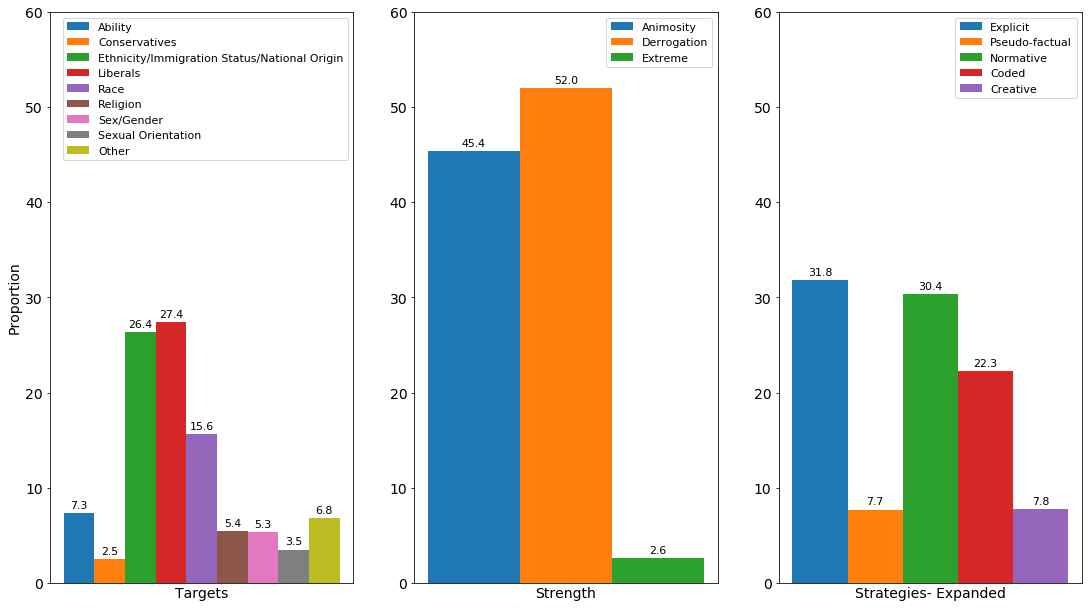

In [489]:
#Define plot parameters
fig, axs = plt.subplots(1, 3)
fig.set_size_inches(18.5, 10.5)
(ax1, ax2, ax3) = axs
plt.rc('font', size=11)
plt.rc('axes', labelsize=14)  
plt.rc('xtick', labelsize=14)   
plt.rc('ytick', labelsize=14)
x = np.arange(1)  
width = 0.15


#First subplot
rects1 = ax1.bar(x - 4*width, target_count_dict['ability'], width, label='Ability')
rects2 = ax1.bar(x - 3*width, round(target_count_dict['conservative political figure'] + target_count_dict['conservatives'], 4), width, label='Conservatives')
rects3 = ax1.bar(x - 2*width, target_count_dict['ethnicity/immigration status/national origin'], width, label='Ethnicity/Immigration Status/National Origin')
rects4 = ax1.bar(x - width, target_count_dict['liberals'] + target_count_dict['liberal political figure'], width, label='Liberals')
rects5 = ax1.bar(x, target_count_dict['race'], width, label='Race')
rects6 = ax1.bar(x + width, target_count_dict['religion'], width, label='Religion')
rects7 = ax1.bar(x + 2*width, target_count_dict['sex/gender'], width, label='Sex/Gender')
rects8 = ax1.bar(x + 3*width, target_count_dict['sexual orientation'], width, label='Sexual Orientation')
#add to other b/c >1% of data: age, celebrity, leftists, socio-economic status
rects9 = ax1.bar(x + 4*width, round(target_count_dict['other'] + target_count_dict['age'] + target_count_dict['celebrity'] +  target_count_dict['leftists'] + target_count_dict['socioeconomic status'], 4), 
                 width, label='Other')

ax1.set_ylabel('Proportion')
ax1.set_xlabel('Targets')
plt.setp(ax1.get_xticklabels(), visible=False)
ax1.set_xticks([], [])
ax1.set_ylim([0,60])
ax1.legend() #loc="upper center", bbox_to_anchor=(0.5,-0.15))
show_values_on_bars(ax1)




#Second subplot
rects1 = ax2.bar(x - width, animosity, width, label='Animosity')
rects2 = ax2.bar(x, derrogation, width, label='Derrogation')
rects3 = ax2.bar(x + width, extreme, width, label='Extreme')

#ax2.set_ylabel('Proportion')
ax2.set_xlabel('Strength')
plt.setp(ax2.get_xticklabels(), visible=False)
ax2.set_ylim([0,60])
ax2.set_xticks([], [])
ax2.legend()
show_values_on_bars(ax2)


#Third Subplot
rects1 = ax3.bar(x - 2*width, explicit, width, label='Explicit')
rects2 = ax3.bar(x - width, pseudo_factual, width, label='Pseudo-factual')
rects3 = ax3.bar(x, normative, width, label='Normative')
rects4 = ax3.bar(x + width, coded, width, label='Coded')
rects5 = ax3.bar(x + 2*width, creative, width, label='Creative')

#ax3.set_ylabel('Proportion')
ax3.set_xlabel('Strategies- Expanded')
ax3.set_xticks([], [])
ax3.set_ylim([0,60])
ax3.legend()
show_values_on_bars(ax3)


fig.savefig('label_distribution_by_cat2.png',bbox_inches='tight')

### Plot Interaction between Label Distributions and Ambiguity

posx and posy should be finite values
posx and posy should be finite values


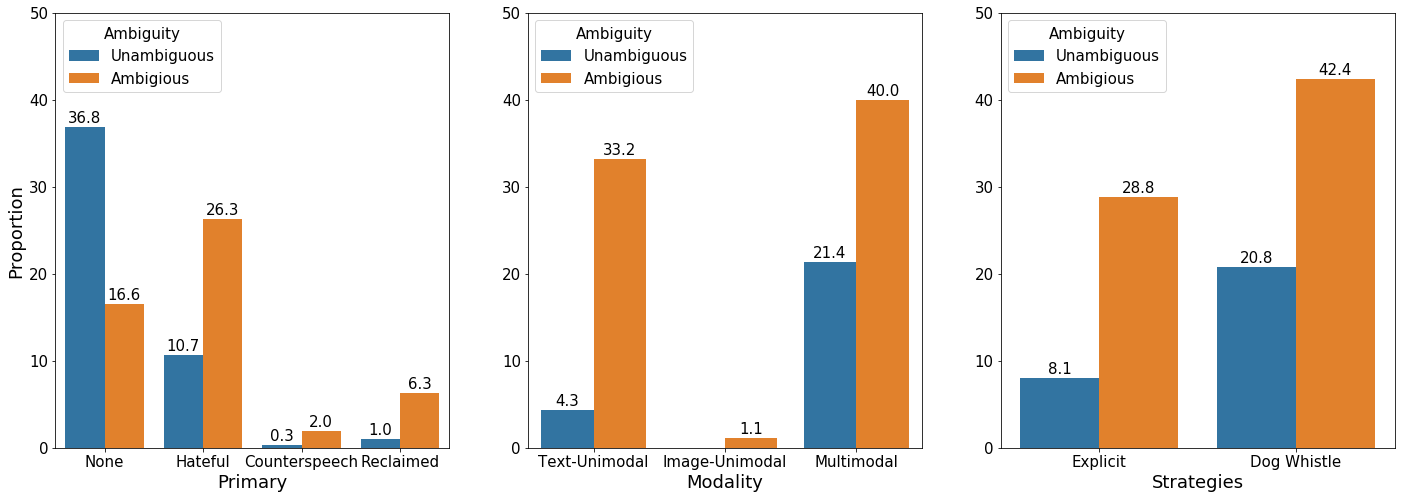

posx and posy should be finite values
posx and posy should be finite values


In [431]:
fig = plt.figure(figsize=(24, 8))
subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.15)
plt.rc('font', size=15)
plt.rc('axes', labelsize=18)  
plt.rc('xtick', labelsize=15)   
plt.rc('ytick', labelsize=15)  

plt.subplot(1, 3, 1)
g1 = sns.barplot(x="Primary_numeric_gt", y="Primary_numeric_gt", data=df, 
                 estimator=lambda x: len(x) / len(df) *100, hue= "Primary_numeric_expert_is_ambiguous")
g1.set_xlabel('Primary')
g1.set_ylabel('Proportion')#, rotation=0) 
g1.xaxis.set_ticklabels(['None', 'Hateful', 'Counterspeech', 'Reclaimed'], rotation=0)
g1.set_ylim([0,50])
show_values_on_bars(g1)
g1.legend()
h, l = g1.get_legend_handles_labels()
g1.legend(h, ["Unambiguous", "Ambigious"], title="Ambiguity", loc='upper left')


plt.subplot(1, 3, 2)
g2 = sns.barplot(x="Modality_numeric_gt", y="Modality_numeric_gt", data=df_not_none, 
                 estimator=lambda x: len(x) / len(df_not_none) *100, hue= "Modality_numeric_expert_is_ambiguous")
g2.set_xlabel('Modality')
g2.set_ylabel(' ', rotation=0) 
g2.xaxis.set_ticklabels(['Text-Unimodal', 'Image-Unimodal', 'Multimodal'], rotation=0) 
g2.set_ylim([0, 50])
show_values_on_bars(g2)
g2.legend()
h, l = g2.get_legend_handles_labels()
g2.legend(h, ["Unambiguous", "Ambigious"], title="Ambiguity", loc='upper left')


plt.subplot(1, 3, 3)
g3 = sns.barplot(x="Strategies_numeric_gt", y="Strategies_numeric_gt", data=df_hate, 
                 estimator=lambda x: len(x) / len(df_hate) *100, hue= "Strategies_numeric_expert_is_ambiguous")
g3.set_xlabel('Strategies')
g3.set_ylabel(' ', rotation=0) 
g3.xaxis.set_ticklabels(['Explicit', 'Dog Whistle'], rotation=0) 
g3.set_ylim([0,50])
show_values_on_bars(g3)
g3.legend()
h, l = g3.get_legend_handles_labels()
g3.legend(h, ["Unambiguous", "Ambigious"], title="Ambiguity", loc='upper left')


plt.show()
fig.savefig('label_distributions_by_ambiguity.png',bbox_inches='tight')

### Plot Distribution of Primary Annotations relative to Modality Annotations

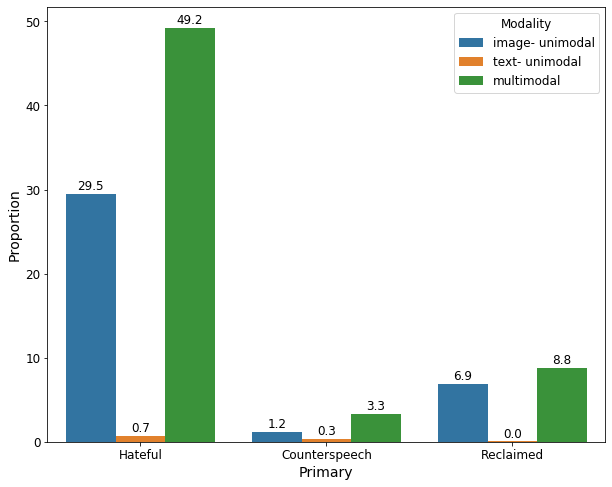

<Figure size 432x288 with 0 Axes>

In [437]:
#Primary annotation by modality
plt.figure(figsize=(10,8))
plt.rc('font', size=12)
plt.rc('axes', labelsize=14)  
plt.rc('xtick', labelsize=12)   
plt.rc('ytick', labelsize=12)
ax = sns.barplot(x="Primary_numeric_gt", y="Primary_numeric_gt", hue = "Modality_numeric_gt", data=df_not_none, 
                 estimator=lambda x: len(x) / len(df_not_none) * 100)
ax.set_xlabel('Primary')
ax.set_ylabel('Proportion') #, rotation=0) 
ax.xaxis.set_ticklabels(['Hateful', 'Counterspeech', 'Reclaimed'], rotation=0)
show_values_on_bars(ax)
ax.legend()

h, l = ax.get_legend_handles_labels()
ax.legend(h, ["image- unimodal", "text- unimodal", "multimodal"], title="Modality", loc='upper right')
plt.show()

plt.savefig('Primary_distribution_by_modality.png', bbox_inches='tight')

### Plot Distribution of Dog Whistle by Modality

In [490]:
#Prepare Strength by Strategy data
animosity_count_explicit = 0
derrogation_count_explicit = 0  
extreme_count_explicit = 0

for i in df_explicit["Strength_numeric"]:
    for j in i:
        if j == 1:
            animosity_count_explicit += 1
        elif j == 2:
            derrogation_count_explicit += 1
        elif j == 3:
            extreme_count_explicit += 1
            
total_count_explicit = animosity_count_explicit + derrogation_count_explicit + extreme_count_explicit
            
animosity_count_dw = 0
derrogation_count_dw = 0  
extreme_count_dw = 0

for i in df_dw["Strength_numeric"]:
    for j in i:
        if j == 1:
            animosity_count_dw += 1
        elif j == 2:
            derrogation_count_dw += 1
        elif j == 3:
            extreme_count_dw += 1

total_count_dw = animosity_count_dw + derrogation_count_dw + extreme_count_dw
 
strength_explicit = [round(animosity_count_explicit/(total_count_explicit)*100, 1), round(derrogation_count_explicit/(total_count_explicit)*100, 1), round(extreme_count_explicit/(total_count_explicit)*100, 1)]
strength_dw = [round(animosity_count_dw/(total_count_dw)*100, 1), round(derrogation_count_dw/(total_count_dw)*100, 1), round(extreme_count_dw/(total_count_dw)*100, 1)]

#Prepare Targets by Strategy data
target_count_dict_dw = {
         'ability': 0,
         'age': 0,
         'celebrity': 0,
         'conservative political figure': 0,
         'conservatives': 0,
         'ethnicity/immigration status/national origin': 0,
         'sex/gender': 0,
         'leftists': 0,
         'liberal political figure': 0,
         'liberals': 0,
         'other': 0,
         'race': 0,
         'religion': 0,
         'sexual orientation': 0,
         'socioeconomic status': 0
    }

for row in df_dw["Target_categories"]:
    for annotator in row:
        for word in annotator:
            try:
                if word != "none":
                    target_count_dict_dw[word] += 1
            except:
                for i in word:
                    if i != "none":
                        target_count_dict_dw[i] += 1

            
total_count_dw = sum(list(target_count_dict_dw.values()))

for i in target_count_dict.keys():
    target_count_dict_dw[i] = round(target_count_dict_dw[i]/total_count_dw *100, 1)
    
    
    
target_count_dict_explicit = {
         'ability': 0,
         'age': 0,
         'celebrity': 0,
         'conservative political figure': 0,
         'conservatives': 0,
         'ethnicity/immigration status/national origin': 0,
         'sex/gender': 0,
         'leftists': 0,
         'liberal political figure': 0,
         'liberals': 0,
         'other': 0,
         'race': 0,
         'religion': 0,
         'sexual orientation': 0,
         'socioeconomic status': 0
    }

for row in df_explicit["Target_categories"]:
    for annotator in row:
        for word in annotator:
            try:
                if word != "none":
                    target_count_dict_explicit[word] += 1
            except:
                for i in word:
                    if i != "none":
                        target_count_dict_explicit[i] += 1

            
total_count_explicit = sum(list(target_count_dict_explicit.values()))

for i in target_count_dict.keys():
    target_count_dict_explicit[i] = round(target_count_dict_explicit[i]/total_count_explicit *100, 1)



target_explicit = [target_count_dict_explicit['ability'],
            target_count_dict_explicit['conservative political figure'] + target_count_dict_explicit['conservatives'],
            target_count_dict_explicit['ethnicity/immigration status/national origin'],
            target_count_dict_explicit['liberals'],
            target_count_dict_explicit['race'],
            target_count_dict_explicit['religion'],
            target_count_dict_explicit['sex/gender'],
            target_count_dict_explicit['sexual orientation'],
            round(target_count_dict_explicit['other'] + target_count_dict_explicit['age'] + target_count_dict_explicit['celebrity'] +  target_count_dict_explicit['leftists'] + target_count_dict_explicit['socioeconomic status'] + target_count_dict_explicit['liberal political figure'], 1)]

target_dw = [target_count_dict_dw['ability'], 
             target_count_dict_dw['conservative political figure'] + target_count_dict_dw['conservatives'],
             target_count_dict_dw['ethnicity/immigration status/national origin'],
             target_count_dict_dw['liberals'] + target_count_dict_dw['liberal political figure'],
             target_count_dict_dw['race'],
             target_count_dict_dw['religion'],
             target_count_dict_dw['sex/gender'],
             target_count_dict_dw['sexual orientation'],
             round(target_count_dict_dw['other'] + target_count_dict_dw['age'] + target_count_dict_dw['celebrity'] + target_count_dict_dw['leftists'] + target_count_dict_dw['socioeconomic status'], 1)]



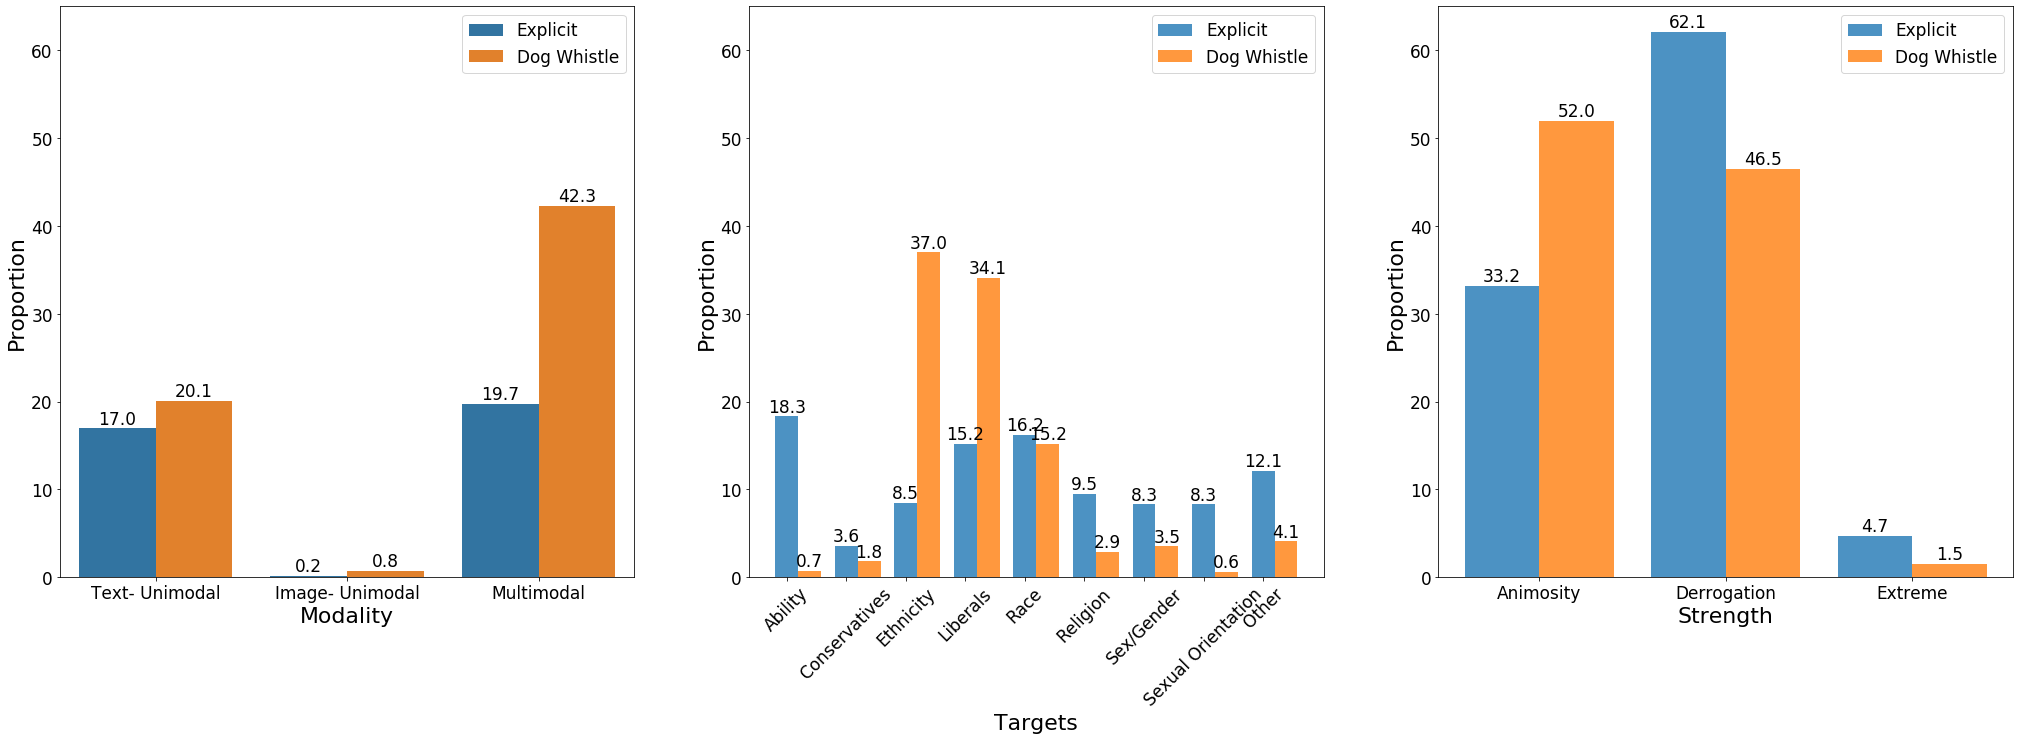

In [492]:
fig, axs = plt.subplots(1, 3)
fig.set_size_inches(35, 10.5)
(ax1, ax2, ax3) = axs


plt.rc('font', size=17)
plt.rc('axes', labelsize=22)  
plt.rc('xtick', labelsize=17)   
plt.rc('ytick', labelsize=17)



#Plot subplot 1
g1 = sns.barplot(x= "Modality_numeric_gt", y="Modality_numeric_gt", hue = "Strategies_numeric_gt", data=df_hate,
                 estimator=lambda x: len(x) / len(df_hate) * 100, ax=ax1)
ax1.set_xlabel('Modality')
ax1.set_ylabel('Proportion')
ax1.xaxis.set_ticklabels(['Text- Unimodal', 'Image- Unimodal', 'Multimodal'])#, rotation=45)
ax1.set_ylim([0, 65])
show_values_on_bars(ax1)
h, l = ax1.get_legend_handles_labels()
ax1.legend(h, ["Explicit", "Dog Whistle"],  loc='upper right')



#Plot subplot 2
index = np.arange(9) 
bar_width = 0.5
opacity = 0.8

rects1 = ax2.bar(index*1.3, target_explicit, bar_width, alpha=opacity, label='Explicit', align='edge', color= 'C0')
rects2 = ax2.bar(index*1.3 + bar_width, target_dw, bar_width, alpha=opacity, label='Dog Whistle', align='edge', color = "C1")


ax2.set_ylabel('Proportion')
ax2.set_xlabel('Targets')
ax2.set_xticks(index*1.3 + 0.5*bar_width)
ax2.xaxis.set_ticklabels(['Ability', 'Conservatives', 'Ethnicity','Liberals', 'Race', 'Religion', 'Sex/Gender', 'Sexual Orientation', 'Other'], rotation=45)
ax2.set_ylim([0,65])
ax2.legend()
show_values_on_bars(ax2)



#Plot subplot 3
index = np.arange(3)
bar_width = 0.4
opacity = 0.8

rects1 = ax3.bar(index, strength_explicit, bar_width, alpha=opacity, label='Explicit')
rects2 = ax3.bar(index + bar_width, strength_dw, bar_width, alpha=opacity, label='Dog Whistle')

ax3.set_xlabel('Strength')
ax3.set_ylabel('Proportion')
ax3.set_ylim([0, 65])
ax3.set_xticks(index + 0.5*bar_width)
ax3.xaxis.set_ticklabels(['Animosity', 'Derrogation', 'Extreme'])#, rotation=45)
ax3.legend()
show_values_on_bars(ax3)


plt.savefig('DW_distribution_by_other_cols.png', bbox_inches='tight')

In [439]:
#Show % of tweets that are multi-targeted/intersectional

cat_dict = {1: "Hateful", 2: "Counter-speech", 3: "Reclaimed"}

multi_target_total_count = 0

for i in [1, 2, 3]:
    multi_target_count = 0
    df_temp = df_not_none[df_not_none["Primary_numeric_gt"] == i].reset_index(drop=True)
    for row_num in range(len(df_temp)):
        flattened_targets = functools.reduce(operator.iconcat, df_temp.loc[row_num, "Target_numeric"], [])
        #print(flattened_targets)
        if len(set(flattened_targets)) > 1:
            multi_target_count += 1
            
    print("Percent of multi-targeted tweets in category {}: {}".format(cat_dict[i],  multi_target_count/len(df_temp)))
    multi_target_total_count += multi_target_count
    
print("Total percent of multi-targeted tweets: {}".format(multi_target_total_count/len(df_not_none)))

Percent of multi-targeted tweets in category Hateful: 0.54
Percent of multi-targeted tweets in category Counter-speech: 0.7168141592920354
Percent of multi-targeted tweets in category Reclaimed: 0.7049180327868853
Total percent of multi-targeted tweets: 0.5744954916273078


### Lexical Representations

In [171]:
STOP_WORDS = list(stop_words.ENGLISH_STOP_WORDS)

for col in ["Primary_numeric_gt", "Strategies_numeric_gt"]: 
    cat_num = len(df[col].value_counts())
    for i in range(cat_num):
        df_temp = df[df[col]==i]
        lexicon = []
        for row in df_temp["tweet_text"]: #use image text too?
            for word in row.lower().split():
                if word not in STOP_WORDS:
                    lexicon.append(word)
        
        temp_count = Counter(lexicon)
        
        print("The 10 most common words in {}-{} are \n{}".format(col, i, temp_count.most_common(10)))
    
    print()

The 10 most common words in Primary_numeric_gt-0 are 
[('nigga', 1125), ('#buildthewall', 244), ('card', 169), ('cunt', 166), ('like', 156), ('just', 111), ('#maga', 106), ('twat', 103), ('victim', 100), ('ass', 94)]
The 10 most common words in Primary_numeric_gt-1 are 
[('#buildthewall', 389), ('sjw', 295), ('race', 276), ('card', 193), ('#maga', 141), ('@realdonaldtrump', 109), ('retarded', 93), ('like', 85), ('just', 65), ('card.', 65)]
The 10 most common words in Primary_numeric_gt-2 are 
[('sjw', 20), ('called', 15), ('#buildthewall', 11), ('faggot', 10), ('white', 10), ('nigga', 10), ('islam', 9), ('just', 9), ('dyke', 7), ('said', 6)]
The 10 most common words in Primary_numeric_gt-3 are 
[('nigga', 180), ('dyke', 43), ('i’m', 28), ('like', 26), ('real', 23), ('redneck', 19), ('just', 17), ('ass', 15), ('faggot', 14), ('happy', 14)]

The 10 most common words in Strategies_numeric_gt-0 are 
[('nigga', 1315), ('#buildthewall', 257), ('like', 185), ('card', 175), ('cunt', 171), ('ju